# Exploramos alguns resultados para avaliar a similaridade entre nossa amostra e a clonagem

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import torchaudio
import torch

def load_audio(file_path):
    waveform, sample_rate = torchaudio.load(file_path)
    return waveform, sample_rate

original, sr1 = load_audio('C:/Users/moura/Projetos/A03_PDSI_voice_cloning/data/Miley_cortes2.wav')
clonagem, sr2 = load_audio('C:/Users/moura/Projetos/A03_PDSI_voice_cloning/data/baixados (3).wav')

In [105]:
# cortando o tensor em 1/3
clonagem = clonagem[0, 0:131072]
array_reshaped = clonagem.reshape(1, 131072)
tensor = torch.tensor(array_reshaped)


C:\Users\moura\AppData\Local\Temp\ipykernel_14216\1465513812.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(array_reshaped)


In [109]:
#ESPECTROGRAMA
def plot_spectrogram(waveform, sample_rate, title):
    X = librosa.stft(waveform.numpy()[0])
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.title(title)
    plt.show()
    
def plot_harmonic(waveform1, waveform2, sample_rate1, sample_rate2, title1, title2):
    y_harmonic1, _ = librosa.effects.hpss(waveform1.numpy()[0])
    y_harmonic2, _ = librosa.effects.hpss(waveform2.numpy()[0])

    plt.figure(figsize=(14, 5))

    # Plotar o primeiro harmônico
    plt.plot(y_harmonic1, color='#7DBCE6', label=title1)

    # Plotar o segundo harmônico
    plt.plot(y_harmonic2, color='#C497DE', label=title2)

    plt.title(f"{title1} e {title2}")
    plt.legend()
    plt.show()
    
# Envelope
def plot_signal_envelopes(waveform1, sample_rate1, waveform2, sample_rate2, title):
    # Calcula o envelope para o primeiro waveform
    envelope1 = librosa.onset.onset_strength(y=waveform1.numpy()[0], sr=sample_rate1)

    # Calcula o envelope para o segundo waveform
    envelope2 = librosa.onset.onset_strength(y=waveform2.numpy()[0], sr=sample_rate2)

    plt.figure(figsize=(14, 5))
    plt.plot(envelope1, label='Original', color='#7DBCE6')
    plt.plot(envelope2, label='Clonado', color='#C497DE')
    plt.title(title)
    plt.legend()
    plt.show()

#Gráfico Zero Crossing Rate
def plot_zero_crossing_rate(waveform1, waveform2, sample_rate1, sample_rate2, title):
    # Calcula o ZCR para ambos os waveforms
    zcr1 = librosa.feature.zero_crossing_rate(waveform1.numpy()[0])[0]
    zcr2 = librosa.feature.zero_crossing_rate(waveform2.numpy()[0])[0]

    plt.figure(figsize=(14, 5))
    plt.plot(zcr1, color='#7DBCE6', label='Original')
    plt.plot(zcr2, color='#C497DE', label='Clonado')

    plt.title(title)
    plt.xlabel('Frames')
    plt.ylabel('Zero Crossing Rate')
    plt.legend()
    plt.show()


# Gráfico transformada de Fourier
def plot_fft(waveforms, sample_rates, titles, colors):
    plt.figure(figsize=(10, 4))
    
    for waveform, sample_rate, title, color in zip(waveforms, sample_rates, titles, colors):
        # Calcula a FFT
        fft_result = np.fft.fft(waveform.numpy())
        freqs = np.fft.fftfreq(len(fft_result), 1 / sample_rate)

        # Plot para cada waveform
        plt.plot(freqs, np.abs(fft_result), label=title, color=color)
    
    plt.title("FFT dos Áudios")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.xlim([0, max(sample_rates) / 2])
    plt.legend()
    plt.show()

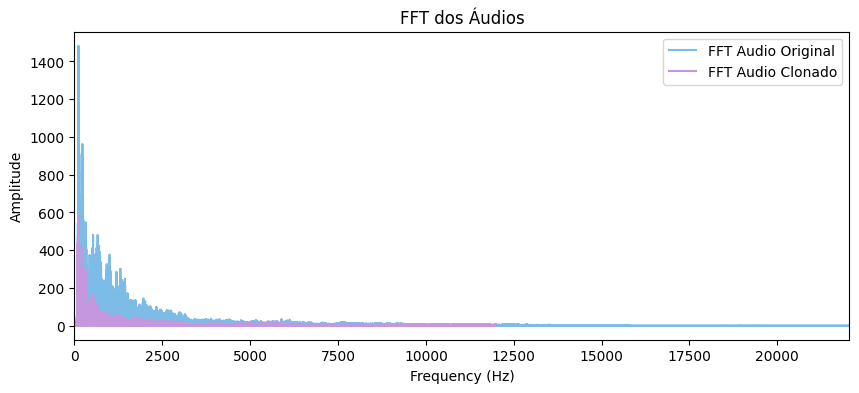

In [110]:
# Transformada de Fourier
plot_fft(
    waveforms=[original[0], tensor[0]], 
    sample_rates=[sr1, sr2], 
    titles=["FFT Audio Original", "FFT Audio Clonado"], 
    colors=["#7DBCE6", "#C497DE"]
)


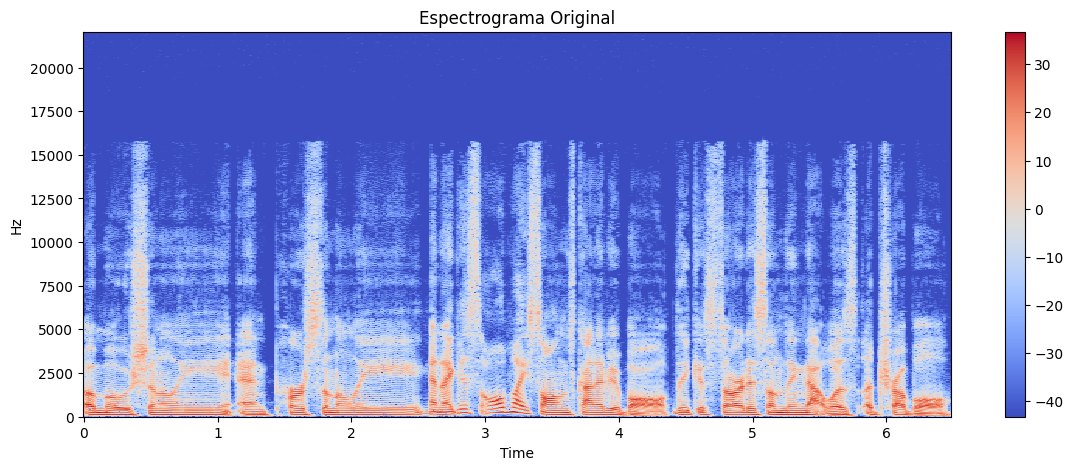

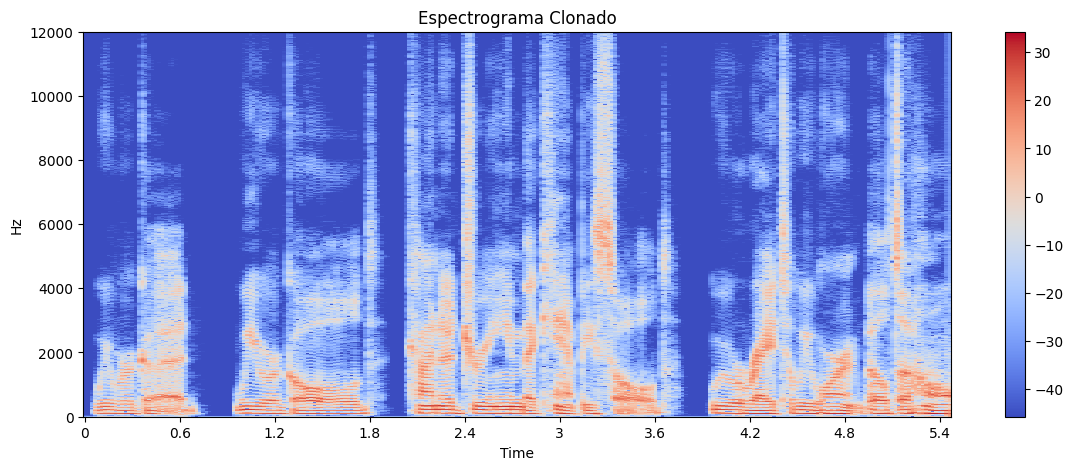

In [111]:

plot_spectrogram(original, sr1, "Espectrograma Original")
plot_spectrogram(tensor, sr2, "Espectrograma Clonado")

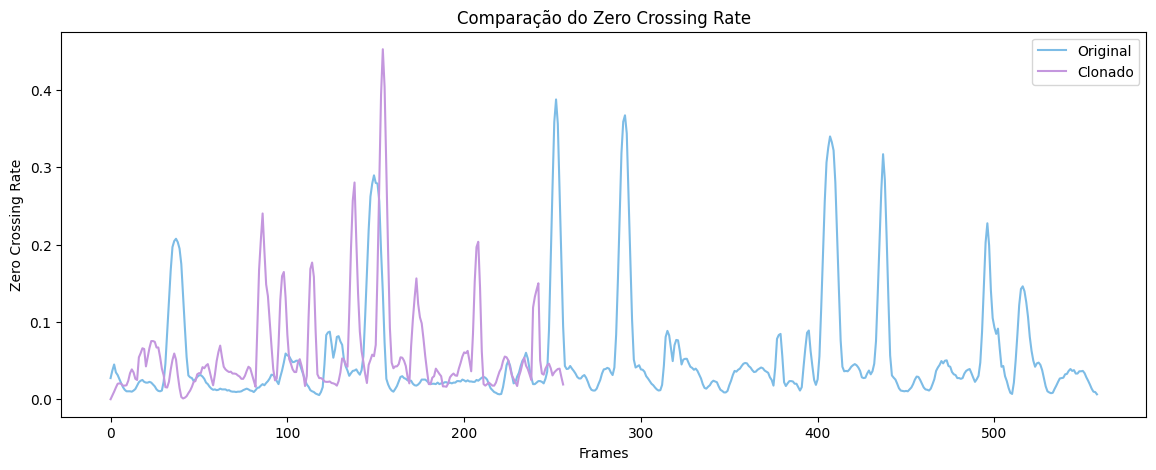

In [112]:
# Zero Crossing Rate
plot_zero_crossing_rate(original, tensor, sr1, sr2, "Comparação do Zero Crossing Rate")

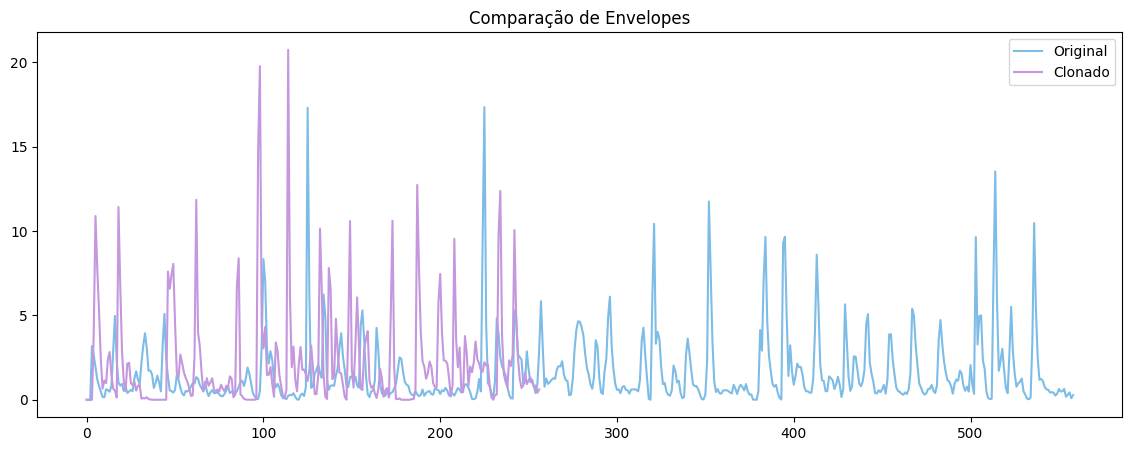

In [113]:
# Envelopes
plot_signal_envelopes(original, sr1, tensor, sr2, "Comparação de Envelopes")

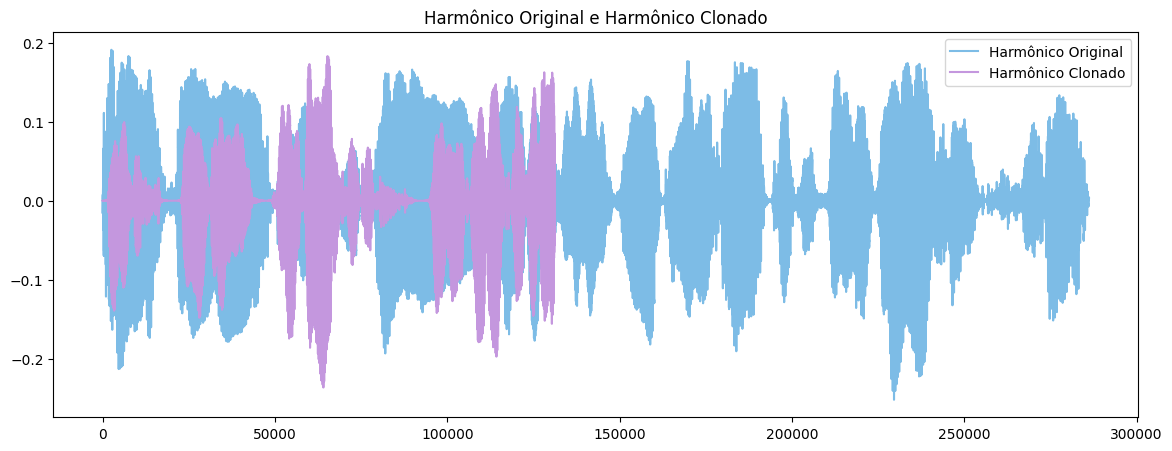

In [114]:

# Harmônico
plot_harmonic(original, tensor, sr1, sr2, "Harmônico Original", "Harmônico Clonado")


In [115]:


def load_and_get_mfcc(file_path, n_mfcc=13):
    # Carregar o arquivo de áudio
    audio, sample_rate = librosa.load(file_path, sr=None)  # sr=None para manter a taxa de amostragem original
    # Extrair MFCC
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    return mfcc


def compare_mfcc(mfcc1, mfcc2):
    # Certificar de que ambos os MFCCs são numpy arrays
    if isinstance(mfcc1, torch.Tensor):
        mfcc1 = mfcc1.numpy()
    if isinstance(mfcc2, torch.Tensor):
        mfcc2 = mfcc2.numpy()

    # Garantir que ambos os sinais têm o mesmo comprimento
    min_length = min(mfcc1.shape[1], mfcc2.shape[1])
    mfcc1 = mfcc1[:, :min_length]
    mfcc2 = mfcc2[:, :min_length]

    # Calcular a distância euclidiana média
    distance = np.mean(np.linalg.norm(mfcc1 - mfcc2, axis=0))
    return distance

# Carregar os áudios e calcular MFCC
mfcc_andre_1 = original
mfcc_andre_clonado = tensor

# Comparar os MFCCs
distance = compare_mfcc(mfcc_andre_1, mfcc_andre_clonado)
print(f"Distância entre os MFCCs: {distance}")

# Uma distância menor indica maior similaridade entre os áudios


Distância entre os MFCCs: 0.1050708070397377
